In [1]:
from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.Chem import Descriptors, MACCSkeys
from rdkit.ML.Descriptors import MoleculeDescriptors

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

from mordred import Calculator, descriptors
import sklearn.preprocessing as preprocessing

# 1. Nhập dữ liệu

In [2]:
train_test_path = "../data_for_modeling/filter_data/v1/clean_data/HDAC2_train_test_clean_data.xlsx"; 
train_dataset = pd.read_excel(train_test_path, sheet_name='train_dataset')
test_dataset = pd.read_excel(train_test_path, sheet_name='test_dataset')

In [3]:
train_dataset.head()

,SMILES,CID,IC50 (uM),ACTIVITY
0,O=C(CCCCCN1C(=O)c2cccc3c(N4CCOCC4)ccc(c23)C1=O)NO,122376192,0.0256,Active
1,O=C(CCCCCC(=O)NN=Cc1ccc(-c2ccncc2)cc1)NO,73707543,0.0142,Active
2,O=C(CCCCCn1cc(Nc2ncc(Cl)c(Nc3ccc(Cl)cc3)n2)cn1)NO,138377596,0.0610,Active
3,CCOC(=O)c1cc2cc(OC)c(-c3cnc([C@H](CCCCCC(=O)CC...,162657089,0.0091,Active
4,Cc1c2ccc(N(C)c3ccnc(Nc4ccc(C(=O)NCCCCC(=O)Nc5c...,141504719,NaN,Inactive


In [4]:
test_dataset.head()

,SMILES,CID,IC50 (uM),ACTIVITY
0,Cc1ccc(-c2nn(-c3ccccc3)cc2C=CC(=O)Nc2ccc(Br)cc...,70688346,5.020,Inactive
1,Cc1noc(C)c1-c1nc2sc3c(c2c(=O)[nH]1)CCN(CCCCCC(...,155513192,0.112,Active
2,FC(F)(F)c1ccc2c(c1)C1=NCCCN1C(=S)S2,121279020,NaN,Inactive
3,Cc1c2ccc(N(C)c3ccnc(Nc4ccc(C(=O)NCCCC(=O)Nc5cc...,141504712,NaN,Inactive
4,O=C(O)[C@H](Cc1ccccc1)n1nnc(-c2ccccc2)c1C#Cc1c...,155555613,0.000,Inactive


In [5]:
print(len(train_dataset), len(test_dataset))

520 130


# 2. Tien xu ly du lieu với Modred

## 2.1. Tính toán mordred descriptors

In [6]:
def process_modred(data):
    calc = Calculator(descriptors, ignore_3D=True)
    mols = [Chem.MolFromSmiles(smi) for smi in data]
    # pandas df
    df = calc.pandas(mols)
    return df

train_modred_descriptors = process_modred(train_dataset['SMILES'])
test_mordred_descriptors = process_modred(test_dataset['SMILES'])

 23%|██▎       | 118/520 [00:08<00:27, 14.69it/s]


KeyboardInterrupt: 

In [ ]:
train_modred_descriptors.head()

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,0,39.862297,2.563653,5.127307,39.862297,1.328743,4.333541,...,10.462732,65.995099,411.179421,7.475989,2611,53,158.0,190.0,9.111111,6.750000
1,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,0,33.354577,2.311807,4.623613,33.354577,1.282868,4.141488,...,9.652780,59.651445,354.169191,7.378525,2322,32,120.0,131.0,8.055556,6.111111
2,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,0,38.604079,2.359149,4.6987,38.604079,1.286803,4.307605,...,9.987139,78.477652,449.113378,8.806145,3158,39,148.0,166.0,9.388889,6.777778
3,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,1,57.06564,2.589897,4.966272,57.06564,1.296946,4.725175,...,10.756988,103.237690,606.341735,6.737130,7786,68,232.0,277.0,14.256944,9.958333
4,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,0,55.831076,2.463569,4.84444,55.831076,1.298397,4.684716,...,10.584436,94.587452,577.291371,7.401171,8928,67,224.0,261.0,13.305556,9.444444


In [203]:
test_mordred_descriptors.head()

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,0,39.520517,2.443562,4.746695,39.520517,1.317351,4.330894,...,10.169576,79.410662,457.078974,9.141579,2698,43,156.0,180.0,8.5,6.583333
1,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,1,46.657352,2.541652,4.94661,46.657352,1.296038,4.524079,...,10.544578,88.952847,506.210010,7.669849,5032,58,194.0,231.0,10.944444,7.805556
2,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,2,24.059174,2.49536,4.99072,24.059174,1.266272,3.899138,...,10.134321,53.170878,302.015925,10.786283,640,33,106.0,127.0,6.729167,3.944444
3,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,0,54.730593,2.463569,4.844448,54.730593,1.303109,4.663438,...,10.578038,93.521064,563.275721,7.510343,8196,66,220.0,257.0,13.055556,9.194444
4,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,0,39.927952,2.464731,4.819089,39.927952,1.330932,4.328355,...,10.173782,79.373489,393.147727,8.023423,2440,44,154.0,179.0,7.888889,6.722222


## 2.2. Lam sach Modred

- Do thuật toán mã hóa Modred không thể tìm được mọi features của SMILES nên sẽ có một số chỗ không phải là số thực mà là một object báo lỗi, ta sẽ loại bỏ tất cả object báo lỗi này.
- Các dữ liệu sau khi xử lý có giá trị khác numpy.float64 và numpy.int64 thì cho bằng 0.
- Toàn bộ dữ liệu ta xử lý đều là dữ liệu số, vì vậy ta sẽ đặt những object này với giá trị bằng 0.

In [204]:
train_np = np.array(train_modred_descriptors)
test_np = np.array(test_mordred_descriptors)
for (row, col), value in np.ndenumerate(train_np):
    if not (value.__class__ in [int, float, np.float64, np.float32, np.int64, np.int32]):
        train_np[row, col] = 0
        
for (row, col), value in np.ndenumerate(test_np):
    if not (value.__class__ in [int, float, np.float64, np.float32, np.int64, np.int32]):
        test_np[row, col] = 0

train_modred_descriptors = pd.DataFrame(train_np, columns=train_modred_descriptors.columns)
test_mordred_descriptors = pd.DataFrame(test_np, columns=test_mordred_descriptors.columns)
all_mordred_descriptors = pd.concat([train_modred_descriptors, test_mordred_descriptors], ignore_index=False)

In [205]:
print(len(train_modred_descriptors), len(test_mordred_descriptors), len(all_mordred_descriptors))

520 130 650


In [206]:
train_modred_descriptors.head()

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,0,0,0,0,39.862297,2.563653,5.127307,39.862297,1.328743,4.333541,...,10.462732,65.995099,411.179421,7.475989,2611,53,158.0,190.0,9.111111,6.75
1,0,0,0,0,33.354577,2.311807,4.623613,33.354577,1.282868,4.141488,...,9.65278,59.651445,354.169191,7.378525,2322,32,120.0,131.0,8.055556,6.111111
2,0,0,0,0,38.604079,2.359149,4.6987,38.604079,1.286803,4.307605,...,9.987139,78.477652,449.113378,8.806145,3158,39,148.0,166.0,9.388889,6.777778
3,0,0,0,1,57.06564,2.589897,4.966272,57.06564,1.296946,4.725175,...,10.756988,103.23769,606.341735,6.73713,7786,68,232.0,277.0,14.256944,9.958333
4,0,0,0,0,55.831076,2.463569,4.84444,55.831076,1.298397,4.684716,...,10.584436,94.587452,577.291371,7.401171,8928,67,224.0,261.0,13.305556,9.444444


In [207]:
all_mordred_descriptors.head()

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,0,0,0,0,39.862297,2.563653,5.127307,39.862297,1.328743,4.333541,...,10.462732,65.995099,411.179421,7.475989,2611,53,158.0,190.0,9.111111,6.75
1,0,0,0,0,33.354577,2.311807,4.623613,33.354577,1.282868,4.141488,...,9.65278,59.651445,354.169191,7.378525,2322,32,120.0,131.0,8.055556,6.111111
2,0,0,0,0,38.604079,2.359149,4.6987,38.604079,1.286803,4.307605,...,9.987139,78.477652,449.113378,8.806145,3158,39,148.0,166.0,9.388889,6.777778
3,0,0,0,1,57.06564,2.589897,4.966272,57.06564,1.296946,4.725175,...,10.756988,103.23769,606.341735,6.73713,7786,68,232.0,277.0,14.256944,9.958333
4,0,0,0,0,55.831076,2.463569,4.84444,55.831076,1.298397,4.684716,...,10.584436,94.587452,577.291371,7.401171,8928,67,224.0,261.0,13.305556,9.444444


## 2.3. Import and encoding y

In [169]:
y_train = np.array(train_dataset['ACTIVITY'])
y_test = np.array(test_dataset['ACTIVITY'])
print(len(y_train), len(y_test))

520 130


In [170]:
print(y_train[0:5])
print(y_test[0:5])

['Active' 'Active' 'Active' 'Active' 'Inactive']
['Inactive' 'Active' 'Inactive' 'Inactive' 'Inactive']


In [171]:
y_train = preprocessing.LabelEncoder().fit_transform(y_train)
y_test = preprocessing.LabelEncoder().fit_transform(y_test)
y_all = np.append(y_train, y_test)

In [172]:
print(y_train[0:5])
print(y_test[0:5])

[0 0 0 0 1]
[1 0 1 1 1]


# 3. Feature selection

## 3.1. Tạo ma trận features

In [70]:
ic50_train = np.array(train_dataset['IC50 (uM)'])
for i, value in np.ndenumerate(ic50_train):
    if not (value.__class__ in [int, float, np.float64, np.float32, np.int64, np.int32]):
        ic50_train[i] = 0
print(len(ic50_train))
print(ic50_train[:5])

782
[1.81  1.216   nan 0.07    nan]


In [71]:
from sklearn.preprocessing import StandardScaler 
train_modred_descriptors['IC50'] = ic50_train
sc = StandardScaler()
train_modred_np = sc.fit_transform(train_modred_descriptors)
train_modred_descriptors = pd.DataFrame(train_modred_np, columns=train_modred_descriptors.columns)
corr_matrix = train_modred_descriptors.corr(method="pearson")

In [72]:
corr_matrix.head()

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2,IC50
ABC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ABCGG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nAcid,NaN,NaN,1.000000,0.097657,-0.386002,-0.661153,-0.669463,-0.386002,-0.67740,-0.645150,...,0.016139,0.019826,-0.058208,0.740797,-0.056201,-0.022981,-0.041094,0.116583,0.025917,0.083700
nBase,NaN,NaN,0.097657,1.000000,-0.149819,-0.094146,-0.113220,-0.149819,-0.15605,-0.201790,...,0.101066,0.003186,0.230363,0.185742,-0.021924,-0.005876,0.020069,-0.084496,-0.076081,-0.100786
SpAbs_A,NaN,NaN,-0.386002,-0.149819,1.000000,0.603442,0.579648,1.000000,0.51215,0.798499,...,0.730226,0.784963,-0.233803,-0.448690,0.831809,0.832215,0.835513,0.704374,0.802764,-0.180784


1614


<Axes: >

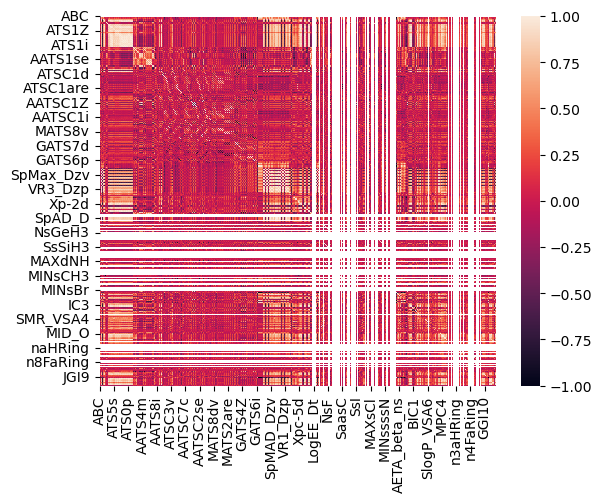

In [73]:
print(len(corr_matrix))
sns.heatmap(corr_matrix)

Loai bo cac cot features co tuong quan voi IC50 nan

1355


<Axes: >

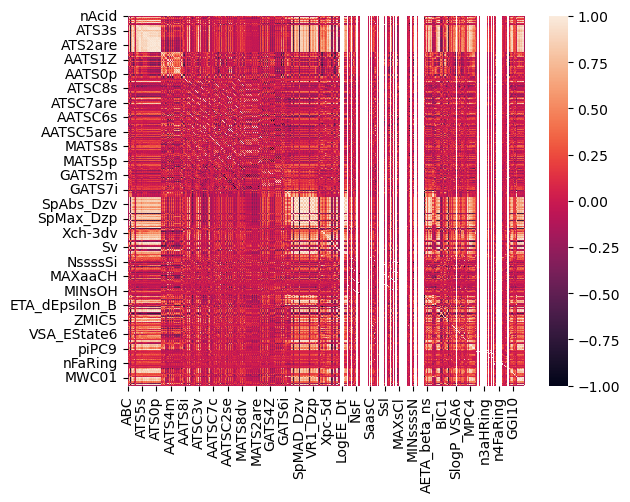

In [74]:
corr_matrix = corr_matrix.dropna(subset=['IC50'])
print(len(corr_matrix))
sns.heatmap(corr_matrix)

Lay cac features co tuong quan voi IC50 lon hon 0.05

In [75]:
ic50_corrs_abs = corr_matrix['IC50'].abs()
features = corr_matrix.loc[ic50_corrs_abs > 0.05, :].index.tolist()
sorted_corr_matrix = corr_matrix.loc[features, features]

sorted_corr_matrix = sorted_corr_matrix.sort_values(by='IC50', ascending=False)
index_order = sorted_corr_matrix.index.tolist()
sorted_corr_matrix = sorted_corr_matrix[index_order].reindex(index_order)

1014


<Axes: >

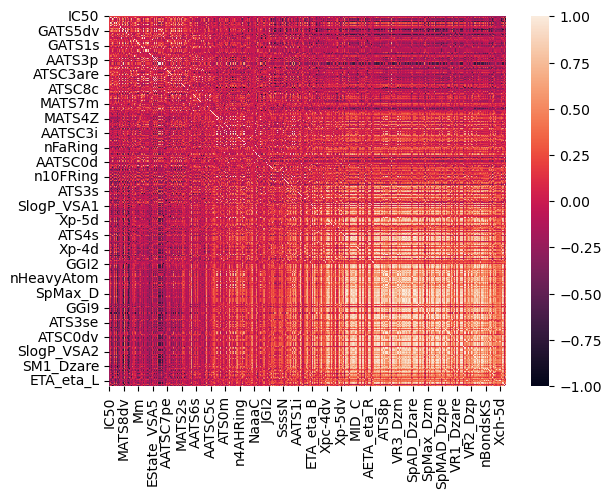

In [76]:
print(len(sorted_corr_matrix))
sns.heatmap(sorted_corr_matrix)

In [77]:
sorted_corr_matrix.head()

,IC50,RPCG,AXp-5d,VSA_EState6,AETA_dBeta,ETA_dBeta,MATS8d,SM1_Dzv,AATSC8d,PEOE_VSA6,...,TIC1,C1SP2,MAXaaNH,IC3,MINaaNH,MATS4d,BIC2,IC1,GATS8d,IC2
IC50,1.000000,0.263316,0.204081,0.203724,0.203050,0.202225,0.200595,0.200178,0.199580,0.193672,...,-0.222635,-0.226074,-0.226146,-0.226758,-0.227288,-0.235375,-0.239159,-0.244606,-0.268843,-0.295577
RPCG,0.263316,1.000000,0.265973,-0.136810,0.122735,0.188433,0.337614,0.487697,0.318423,-0.019935,...,-0.723405,-0.536394,-0.346177,-0.739961,-0.345552,-0.258605,-0.114399,-0.433945,-0.508229,-0.689961
AXp-5d,0.204081,0.265973,1.000000,-0.058002,0.012689,0.092329,-0.066253,0.172020,-0.091652,0.038440,...,-0.291750,-0.137587,-0.269758,-0.337555,-0.269661,0.016996,-0.219140,-0.341577,-0.087566,-0.369689
VSA_EState6,0.203724,-0.136810,-0.058002,1.000000,0.759143,0.702379,-0.157595,0.116363,-0.155553,0.484919,...,0.046158,-0.172976,-0.135266,0.301497,-0.135359,0.054331,-0.451225,-0.156513,0.156662,-0.086852
AETA_dBeta,0.203050,0.122735,0.012689,0.759143,1.000000,0.930466,-0.029468,0.275848,-0.028981,0.160977,...,-0.399604,-0.223103,-0.290099,-0.023501,-0.290689,-0.044718,-0.283074,-0.189284,-0.014334,-0.324003


Lay nua du lieu o tren

In [78]:
def set_zero_diagonal(sorted_corr_matrix):
    col_idx = 0
    arr = []
    for index, row in sorted_corr_matrix.iterrows():
        row.iloc[col_idx] = 0
        col_idx+=1
    return sorted_corr_matrix

upper_triangle = sorted_corr_matrix.where(np.triu(np.ones(sorted_corr_matrix.shape)).astype(bool))
upper_triangle = upper_triangle.fillna(0)
upper_triangle = set_zero_diagonal(upper_triangle)

1014


<Axes: >

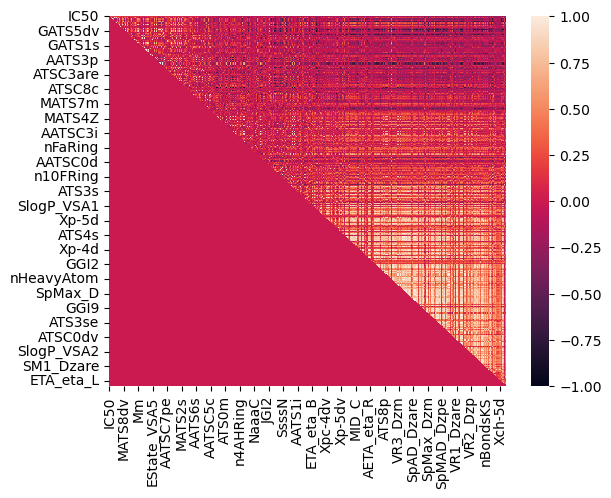

In [79]:
print(len(upper_triangle))
sns.heatmap(upper_triangle)

In [80]:
upper_triangle.head()

,IC50,RPCG,AXp-5d,VSA_EState6,AETA_dBeta,ETA_dBeta,MATS8d,SM1_Dzv,AATSC8d,PEOE_VSA6,...,TIC1,C1SP2,MAXaaNH,IC3,MINaaNH,MATS4d,BIC2,IC1,GATS8d,IC2
IC50,0.0,0.263316,0.204081,0.203724,0.203050,0.202225,0.200595,0.200178,0.199580,0.193672,...,-0.222635,-0.226074,-0.226146,-0.226758,-0.227288,-0.235375,-0.239159,-0.244606,-0.268843,-0.295577
RPCG,0.0,0.000000,0.265973,-0.136810,0.122735,0.188433,0.337614,0.487697,0.318423,-0.019935,...,-0.723405,-0.536394,-0.346177,-0.739961,-0.345552,-0.258605,-0.114399,-0.433945,-0.508229,-0.689961
AXp-5d,0.0,0.000000,0.000000,-0.058002,0.012689,0.092329,-0.066253,0.172020,-0.091652,0.038440,...,-0.291750,-0.137587,-0.269758,-0.337555,-0.269661,0.016996,-0.219140,-0.341577,-0.087566,-0.369689
VSA_EState6,0.0,0.000000,0.000000,0.000000,0.759143,0.702379,-0.157595,0.116363,-0.155553,0.484919,...,0.046158,-0.172976,-0.135266,0.301497,-0.135359,0.054331,-0.451225,-0.156513,0.156662,-0.086852
AETA_dBeta,0.0,0.000000,0.000000,0.000000,0.000000,0.930466,-0.029468,0.275848,-0.028981,0.160977,...,-0.399604,-0.223103,-0.290099,-0.023501,-0.290689,-0.044718,-0.283074,-0.189284,-0.014334,-0.324003


Loai bo cac feature co corr voi nhau lon hon pcc_point

In [82]:
def remove_correlated_features(sorted_df, pcc_point):
    above_pcc_point = (sorted_df > pcc_point) | (sorted_df < -pcc_point)
    shapes = [] 
    features = []
    dropped_features = set()
    for idx, row in sorted_df.iterrows():
        if idx in dropped_features:
            continue
        # print("[+] Working with row: " + idx)
        cols_rows_to_drop = []
        for col in sorted_df.columns:
            if above_pcc_point.loc[idx, col]:
                cols_rows_to_drop.append(col)
        # drop the columns
        # print("[-] Detected in this row:")
        # print(cols_rows_to_drop)
        for col_row_index in cols_rows_to_drop:
            dropped_features.add(col_row_index)
        #Drop the data
        sorted_df = sorted_df.drop(cols_rows_to_drop, axis=1).drop(cols_rows_to_drop, axis=0)
        shapes.append(sorted_df.shape)
        features.append(sorted_df.index.to_list())  
        # check if there are any rows left
        if len(sorted_df) == 0:
            break
    return sorted_df, shapes, features

In [83]:
pcc_point = 0.75
matrix_before_processing = upper_triangle.iloc[1:, 1:]
result_matrix, shapes, features = remove_correlated_features(matrix_before_processing, pcc_point=pcc_point)

In [84]:
print(len(result_matrix), len(shapes), len(features))

249 249 249


Viet ket qua ra file

In [85]:
result_features = result_matrix.columns.to_list()
lengths = []
features_to_file = []
tmp_features = []
for features in result_features:
    tmp_features.append(features)
    lengths.append(len(tmp_features))
    features_to_file.append(tmp_features.copy())

In [86]:
processed_pcc_matrix_fp = "../output/pcc_processed_matrix/clean_data/"+str(pcc_point)+"_pcc_processed_matrix_unclean_data.xlsx"
shapes_and_features_fp = "../output/shapes_and_features/clean_data/"+str(pcc_point)+"_shapes_and_features_unclean_data.xlsx"
#Write to file processed pcc matrix
result_matrix['IC50'] = upper_triangle.iloc[0]
result_matrix.to_excel(processed_pcc_matrix_fp, index=True)

# create a DataFrame with the shapes and features
df_shapes = pd.DataFrame({'Len': lengths, 'Features': features_to_file})
# write the DataFrame to an Excel file
df_shapes.to_excel(shapes_and_features_fp, index=False)

# 4. Test with one model

## 4.1. Choose features from the descriptors

In [173]:
features = ['RPCG', 'SM1_Dzv', 'ETA_dBeta', 'VSA_EState6', 'ATSC8d', 'AXp-5d', 'AATSC8d', 'GATS4d', 'GATS4dv', 'AXp-2d', 'BCUTc-1l', 'PEOE_VSA6', 'SIC5', 'AATS0v', 'AATS3s', 'n7ARing', 'SdsCH', 'ATSC8dv', 'ATSC3s', 'MATS2se', 'ATSC1i']
len(features)

21

In [174]:
X_train = train_modred_descriptors[features]
X_test = test_mordred_descriptors[features]
print(X_train.columns)
print(X_test.columns)
print(len(X_train.columns))

Index(['RPCG', 'SM1_Dzv', 'ETA_dBeta', 'VSA_EState6', 'ATSC8d', 'AXp-5d',
       'AATSC8d', 'GATS4d', 'GATS4dv', 'AXp-2d', 'BCUTc-1l', 'PEOE_VSA6',
       'SIC5', 'AATS0v', 'AATS3s', 'n7ARing', 'SdsCH', 'ATSC8dv', 'ATSC3s',
       'MATS2se', 'ATSC1i'],
      dtype='object')
Index(['RPCG', 'SM1_Dzv', 'ETA_dBeta', 'VSA_EState6', 'ATSC8d', 'AXp-5d',
       'AATSC8d', 'GATS4d', 'GATS4dv', 'AXp-2d', 'BCUTc-1l', 'PEOE_VSA6',
       'SIC5', 'AATS0v', 'AATS3s', 'n7ARing', 'SdsCH', 'ATSC8dv', 'ATSC3s',
       'MATS2se', 'ATSC1i'],
      dtype='object')
21


## 4.2. Standardlization data

In [175]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_np = sc.fit_transform(X_train)
X_test_np = sc.transform(X_test)
X_train = pd.DataFrame(X_train_np, columns = X_train.columns)
X_test = pd.DataFrame(X_test_np, columns = X_test.columns)

<Axes: >

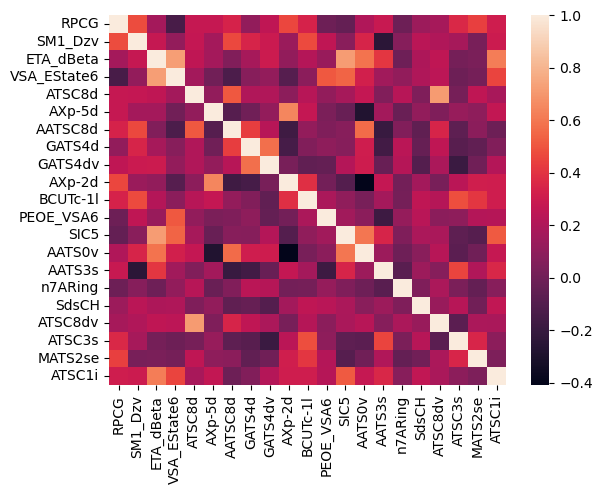

In [176]:
sns.heatmap(X_train.corr())

In [177]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(520, 21)
(520,)
(130, 21)
(130,)


## 4.4. Constructing the model

In [178]:
from sklearn.ensemble import RandomForestClassifier
rf_des_author = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
rf_des_author.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [179]:
from sklearn.neighbors import KNeighborsClassifier
knn_des_author = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn_des_author.fit(X_train, y_train)

KNeighborsClassifier()

In [180]:
from sklearn.svm import SVC
svm_des_author = SVC(kernel='rbf', probability=True, random_state=0)
svm_des_author.fit(X_train, y_train)

SVC(probability=True, random_state=0)

In [181]:
from xgboost import XGBClassifier
bst_des_author = XGBClassifier(n_estimators=100, objective='binary:logistic')
bst_des_author.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

# 5. Evaluate the model

## 5.1. 10-fold-cv

In [182]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [183]:
X_Total = np.concatenate((X_train, X_test), axis=0)
y_Total = np.concatenate((y_train, y_test), axis=0)

In [184]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)

scores = cross_val_score(knn_des_author, X_Total, y_Total, scoring='accuracy', cv=cv, n_jobs=-1)
print('Độ chính xác của 10-fold cross validation: %.3f (%.3f)' % (scores.mean(), scores.std()))

scores = cross_val_score(rf_des_author, X_Total, y_Total, scoring='accuracy', cv=cv, n_jobs=-1)
print('Độ chính xác của 10-fold cross validation: %.3f (%.3f)' % (scores.mean(), scores.std()))

scores = cross_val_score(svm_des_author, X_Total, y_Total, scoring='accuracy', cv=cv, n_jobs=-1)
print('Độ chính xác của 10-fold cross validation: %.3f (%.3f)' % (scores.mean(), scores.std()))

scores = cross_val_score(bst_des_author, X_Total, y_Total, scoring='accuracy', cv=cv, n_jobs=-1)
print('Độ chính xác của 10-fold cross validation: %.3f (%.3f)' % (scores.mean(), scores.std()))

Độ chính xác của 10-fold cross validation: 0.880 (0.036)
Độ chính xác của 10-fold cross validation: 0.891 (0.033)
Độ chính xác của 10-fold cross validation: 0.868 (0.037)
Độ chính xác của 10-fold cross validation: 0.885 (0.028)


### Accuracy, Sensitivity, Specificity

In [185]:
from sklearn.metrics import confusion_matrix, accuracy_score
from tabulate import tabulate
import math

In [186]:
def model_evaluation_calculation(cm):
    tp = cm[0][0]; tn = cm[1][1]; fp = cm[0][1]; fn = cm[1][0]
    ac = (tp+tn)/(tp+tn+fp+fn)
    se = tp/(tp+fn)
    sp = tn/(tn+fp)
    mcc = (tp*tn - fp*fn) / math.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))
    return ac, se, sp, mcc

In [187]:
def me_result(cm):
    print("Confusion matrix:")
    print(cm)
    ac, se, sp, mcc = model_evaluation_calculation(cm)
    print("Comparision:")
    table = [[' ' 'Accuracy', 'Sensitity', 'Specificity', 'MCC'], ['My model', ac, se, sp, mcc]]
    print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

### Accuracy, Sensitivity, Specificity

In [188]:
from sklearn.metrics import confusion_matrix, accuracy_score
from tabulate import tabulate
import math

In [189]:
def model_evaluation_calculation(cm):
    tp = cm[0][0]; tn = cm[1][1]; fp = cm[0][1]; fn = cm[1][0]
    ac = (tp+tn)/(tp+tn+fp+fn)
    se = tp/(tp+fn)
    sp = tn/(tn+fp)
    mcc = (tp*tn - fp*fn) / math.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))
    return ac, se, sp, mcc

In [190]:
def me_result(cm):
    print("Confusion matrix:")
    print(cm)
    ac, se, sp, mcc = model_evaluation_calculation(cm)
    print("Comparision:")
    table = [[' ' 'Accuracy', 'Sensitity', 'Specificity', 'MCC'], ['My model', ac, se, sp, mcc]]
    print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

KNN

In [191]:
#KNN
y_knn_pred = knn_des_author.predict(X_test)
cm = confusion_matrix(y_test, y_knn_pred)
me_result(cm)

Confusion matrix:
[[49 10]
 [ 8 63]]
Comparision:
╒══════════╤═════════════╤═════════════╤═══════════════╤══════════╕
│          │    Accuracy │   Sensitity │   Specificity │      MCC │
╞══════════╪═════════════╪═════════════╪═══════════════╪══════════╡
│ My model │    0.861538 │    0.859649 │      0.863014 │ 0.720244 │
╘══════════╧═════════════╧═════════════╧═══════════════╧══════════╛


RF

In [192]:
#SVM
y_rf_pred = rf_des_author.predict(X_test)
cm = confusion_matrix(y_test, y_rf_pred)
me_result(cm)

Confusion matrix:
[[49 10]
 [ 5 66]]
Comparision:
╒══════════╤═════════════╤═════════════╤═══════════════╤══════════╕
│          │    Accuracy │   Sensitity │   Specificity │      MCC │
╞══════════╪═════════════╪═════════════╪═══════════════╪══════════╡
│ My model │    0.884615 │    0.907407 │      0.868421 │ 0.767917 │
╘══════════╧═════════════╧═════════════╧═══════════════╧══════════╛


SVM

In [193]:
#SVM
y_svm_pred = svm_des_author.predict(X_test)
cm = confusion_matrix(y_test, y_svm_pred)
me_result(cm)

Confusion matrix:
[[48 11]
 [10 61]]
Comparision:
╒══════════╤═════════════╤═════════════╤═══════════════╤══════════╕
│          │    Accuracy │   Sensitity │   Specificity │      MCC │
╞══════════╪═════════════╪═════════════╪═══════════════╪══════════╡
│ My model │    0.838462 │    0.827586 │      0.847222 │ 0.673761 │
╘══════════╧═════════════╧═════════════╧═══════════════╧══════════╛


XGboost

In [194]:
y_bst_pred = bst_des_author.predict(X_test)
cm = confusion_matrix(y_test, y_bst_pred)
me_result(cm)

Confusion matrix:
[[48 11]
 [ 6 65]]
Comparision:
╒══════════╤═════════════╤═════════════╤═══════════════╤══════════╕
│          │    Accuracy │   Sensitity │   Specificity │      MCC │
╞══════════╪═════════════╪═════════════╪═══════════════╪══════════╡
│ My model │    0.869231 │    0.888889 │      0.855263 │ 0.736563 │
╘══════════╧═════════════╧═════════════╧═══════════════╧══════════╛


### AUC

In [195]:
from sklearn.metrics import roc_auc_score
knn_y_proba = knn_des_author.predict_proba(X_test)[:, 1]
rf_y_proba = rf_des_author.predict_proba(X_test)[:, 1]
svm_y_proba = svm_des_author.predict_proba(X_test)[:, 1]
bst_y_proba = bst_des_author.predict_proba(X_test)[:, 1]


knn_auc_score = roc_auc_score(y_test, knn_y_proba)
rf_auc_score = roc_auc_score(y_test, rf_y_proba)
svm_auc_score = roc_auc_score(y_test, svm_y_proba)
bst_auc_score = roc_auc_score(y_test, bst_y_proba)
print(knn_auc_score, rf_auc_score, svm_auc_score, bst_auc_score)

0.9487944616853664 0.9410360467892098 0.928383862497016 0.932680830747195


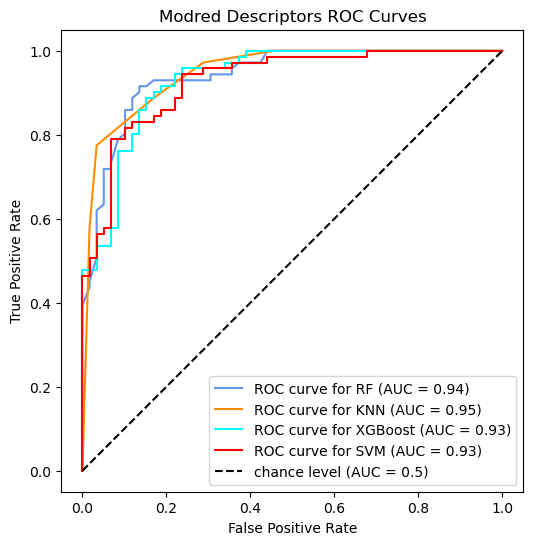

In [196]:
from sklearn.metrics import RocCurveDisplay
fig, ax = plt.subplots(figsize=(6, 6))

RocCurveDisplay.from_estimator(
    estimator=rf_des_author, 
    X=X_test, 
    y=y_test,
    name=f"ROC curve for RF",
    color='cornflowerblue',
    ax=ax)


RocCurveDisplay.from_estimator(
    estimator=knn_des_author, 
    X=X_test, 
    y=y_test,
    name=f"ROC curve for KNN",
    color='darkorange',
    ax=ax)

RocCurveDisplay.from_estimator(
    estimator=bst_des_author, 
    X=X_test, 
    y=y_test,
    name=f"ROC curve for XGBoost",
    color='aqua',
    ax=ax)

RocCurveDisplay.from_estimator(
    estimator=svm_des_author, 
    X=X_test, 
    y=y_test,
    name=f"ROC curve for SVM",
    color='red',
    ax=ax)

plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Modred Descriptors ROC Curves")
plt.legend()
plt.show()